<a href="https://colab.research.google.com/github/Alireza-Khodapanah/Parametric-and-nonparametric-estimation/blob/main/Parametric-and-nonparametric-estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
iris = load_iris()
bc = load_breast_cancer()

In [ ]:
iris_X_train, iris_X_test, iris_y_train, iris_y_test = train_test_split(
        iris.data, iris.target, test_size=0.2, random_state=5)

bc_X_train, bc_X_test, bc_y_train, bc_y_test = train_test_split(
        bc.data, bc.target, test_size=0.2, random_state=42)

In [ ]:
iris_classes = len(np.unique(iris.target))
iris_features = iris.data.shape[1]

bc_classes = len(np.unique(bc.target))
bc_features = bc.data.shape[1]


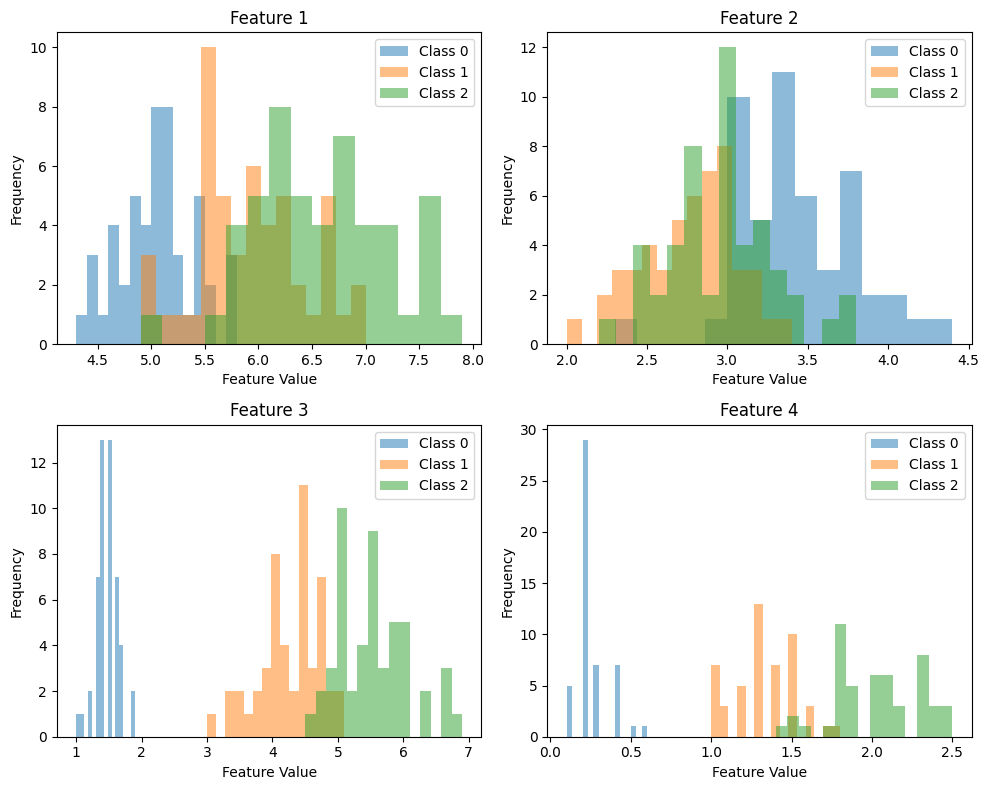

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
axes = axes.flatten()

for i in range(iris_features):
    ax = axes[i]
    for j in range(iris_classes):
        ax.hist(
            iris.data[iris.target == j, i],
            bins=15,
            alpha=0.5,
            label=f"Class {j}"
        )
    ax.set_title(f"Feature {i + 1}")
    ax.set_xlabel("Feature Value")
    ax.set_ylabel("Frequency")
    ax.legend()

plt.tight_layout()
plt.show()

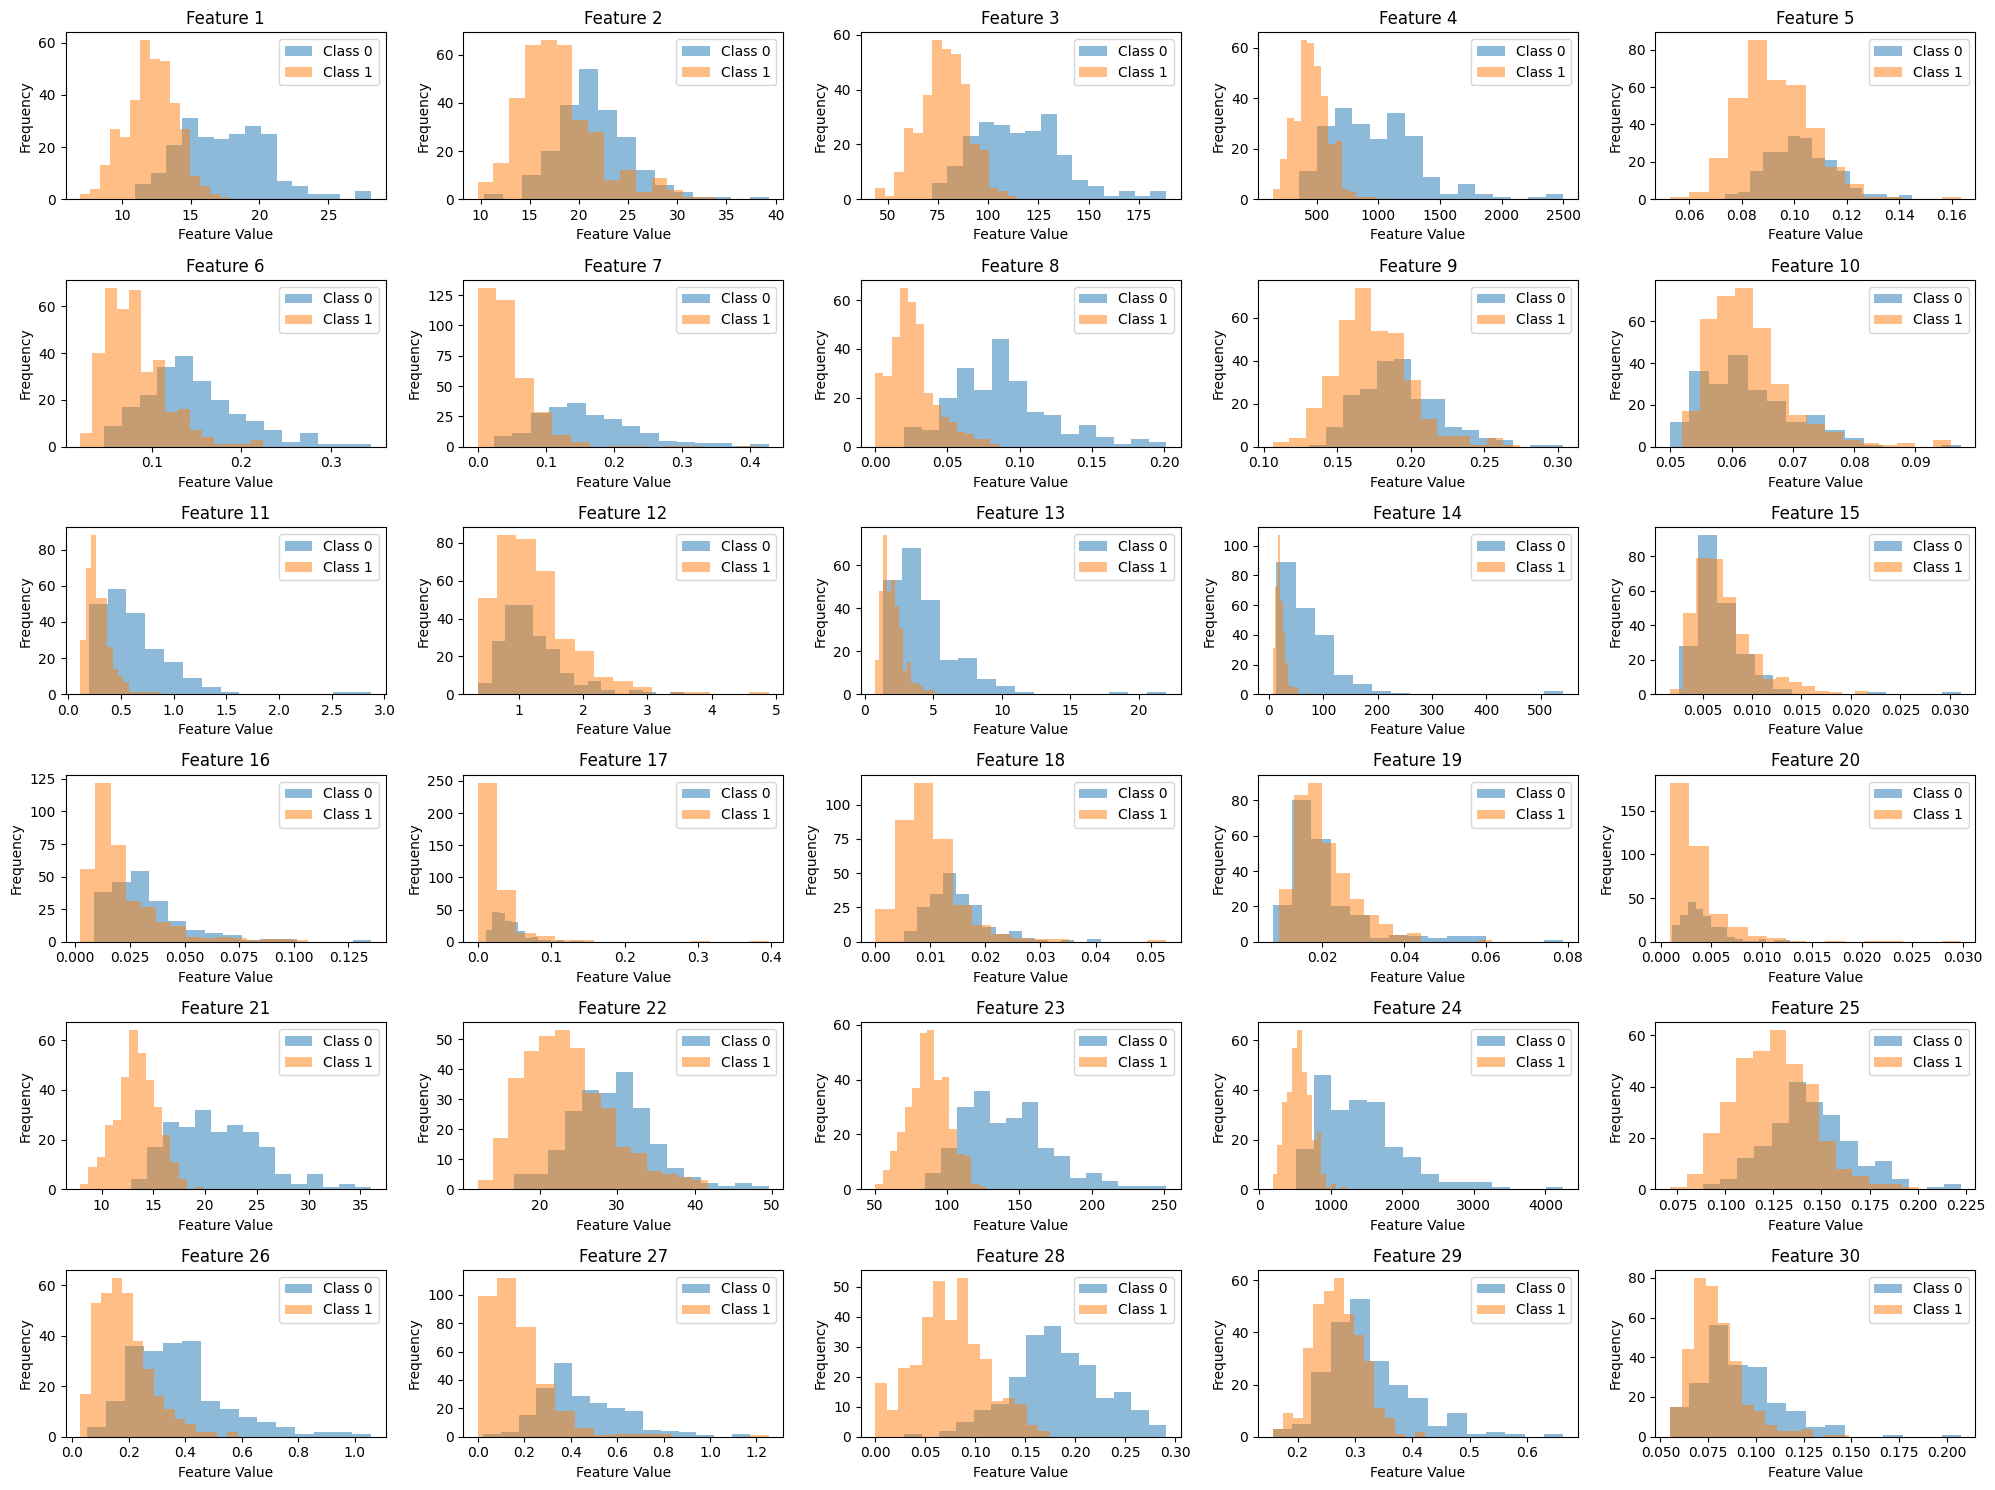

In [ ]:
fig, axes = plt.subplots(nrows=6, ncols=5, figsize=(20, 15))
axes = axes.flatten()

for i in range(bc_features):
    ax = axes[i]
    for j in range(bc_classes):
        ax.hist(
            bc.data[bc.target == j, i],
            bins=15,
            alpha=0.5,
            label=f"Class {j}"
        )
    ax.set_title(f"Feature {i + 1}")
    ax.set_xlabel("Feature Value")
    ax.set_ylabel("Frequency")
    ax.legend()

plt.tight_layout()
plt.show()

### parzen window

In [ ]:
def kernel(x, xi, h):
    d = x.shape[1]
    return np.exp(-np.sum((x - xi) ** 2, axis=1) / (2 * h ** 2)) / ((2 * np.pi * h ** 2) ** (d / 2))

In [ ]:
def parzen_classifier(X_train, y_train, X_test, h):
    classes = np.unique(y_train)
    res = []
    for i in X_test:
        prob = []
        for c in classes:
            xi = X_train[y_train == c]
            dens = [kernel(np.array([i]), x.reshape(1, -1), h) for x in xi]
            prob.append(np.sum(dens) / len(xi))
        res.append(np.argmax(prob))
    return np.array(res)


In [ ]:
def evaluate_parzen(X_train, y_train, X_test, y_test, hs):
    # Parzen
    best_h = None
    best_acc = 0
    for h in hs:
        preds =  parzen_classifier(X_train, y_train, X_test, h)
        acc = accuracy_score(y_test, preds)
        print(f" h: {h}, Accuracy: {acc:.2f}")
        if acc > best_acc:
            best_h = h
            best_acc = acc
    print(f"Best h for Parzen: {best_h}, Accuracy: {best_acc:.2f}")

In [ ]:
h= [0.0002, 0.01, 0.2, 0.5, 1, 1.5, 2, 3, 5, 50, 70, 100, 1000]
evaluate_parzen(iris_X_train, iris_y_train, iris_X_test, iris_y_test,h)

 h: 0.0002, Accuracy: 0.27
 h: 0.01, Accuracy: 0.67
 h: 0.2, Accuracy: 0.90
 h: 0.5, Accuracy: 0.97
 h: 1, Accuracy: 1.00
 h: 1.5, Accuracy: 0.97
 h: 2, Accuracy: 0.97
 h: 3, Accuracy: 0.97
 h: 5, Accuracy: 0.93
 h: 50, Accuracy: 0.93
 h: 70, Accuracy: 0.93
 h: 100, Accuracy: 0.93
 h: 1000, Accuracy: 0.93
Best h for Parzen: 1, Accuracy: 1.00


In [ ]:
h= [0.0002, 0.01, 0.2, 0.5, 1, 1.5, 2, 3, 5, 50, 70, 100, 1000]
evaluate_parzen(bc_X_train, bc_y_train, bc_X_test, bc_y_test,h)

 h: 0.0002, Accuracy: 0.38
 h: 0.01, Accuracy: 0.38
 h: 0.2, Accuracy: 0.45
 h: 0.5, Accuracy: 0.87
 h: 1, Accuracy: 0.93
 h: 1.5, Accuracy: 0.93
 h: 2, Accuracy: 0.93
 h: 3, Accuracy: 0.93
 h: 5, Accuracy: 0.92
 h: 50, Accuracy: 0.97
 h: 70, Accuracy: 0.96
 h: 100, Accuracy: 0.94
 h: 1000, Accuracy: 0.90
Best h for Parzen: 50, Accuracy: 0.97


### KNN

In [ ]:
def knn(X_train, y_train, X_test, k):
    preds = []
    for x in X_test:
        dists = []
        for xi in X_train:
            dist = np.sqrt(np.sum((x - xi) ** 2))
            dists.append(dist)
        indices = np.argsort(dists)[:k]
        labels = y_train[indices]
        preds.append(np.bincount(labels).argmax())
    return np.array(preds)

In [ ]:
def evaluate_knn(X_train, y_train, X_test, y_test, ks):
    best_k = None
    best_acc = 0
    for k in ks:
        preds = knn(X_train, y_train, X_test, k)
        acc = accuracy_score(y_test, preds)
        print(f" k: {k}, Accuracy: {acc:.2f}")
        if acc > best_acc:
            best_k = k
            best_acc = acc
    print(f"Best k for KNN: {best_k}, Accuracy: {best_acc:.2f}")

In [ ]:
k = [1, 3, 5, 7, 10,15,25, 50]
evaluate_knn(iris_X_train, iris_y_train, iris_X_test, iris_y_test,k)

 k: 1, Accuracy: 0.90
 k: 3, Accuracy: 0.93
 k: 5, Accuracy: 0.93
 k: 7, Accuracy: 0.97
 k: 10, Accuracy: 0.97
 k: 15, Accuracy: 0.97
 k: 25, Accuracy: 1.00
 k: 50, Accuracy: 0.97
Best k for KNN: 25, Accuracy: 1.00


In [ ]:
evaluate_knn(bc_X_train, bc_y_train, bc_X_test, bc_y_test,k)

 k: 1, Accuracy: 0.93
 k: 3, Accuracy: 0.93
 k: 5, Accuracy: 0.96
 k: 7, Accuracy: 0.96
 k: 10, Accuracy: 0.97
 k: 15, Accuracy: 0.96
 k: 25, Accuracy: 0.95
 k: 50, Accuracy: 0.95
Best k for KNN: 10, Accuracy: 0.97


### combined classifier

In [ ]:
def parzen_kernel(x, samples, h):
    kernel = np.exp(-((x - samples) ** 2) / (2 * h ** 2))
    return kernel.sum() / (len(samples) * h * np.sqrt(2 * np.pi))

In [ ]:
def parzen_density(x, X_train, y_train, h):

    n_features = X_train.shape[1]
    classes = np.unique(y_train)
    feature_classes = []

    for f in range(n_features):
        max_prob = -np.inf
        best_class = -1
        for cls in classes:
            samples = X_train[y_train == cls, f]
            prob = parzen_kernel(x[f], samples, h)
            if prob > max_prob:
                max_prob = prob
                best_class = cls
        feature_classes.append(best_class)

    return np.array(feature_classes)


In [ ]:
from collections import Counter

def feature_classes_knn(x, X_train, y_train, k):

    n_features = X_train.shape[1]
    feature_classes = []

    for f in range(n_features):
        distances = np.sqrt((X_train[:, f] - x[f]) ** 2)
        k_neighbors_indices = np.argsort(distances)[:k]
        k_neighbors_classes = y_train[k_neighbors_indices]
        most_common_class = Counter(k_neighbors_classes).most_common(1)[0][0]
        feature_classes.append(most_common_class)

    return np.array(feature_classes)


In [ ]:
def combined_classifier(X_test, X_train, y_train, h, k):

    feature_class_parzen = []
    feature_class_knn = []

    for x in X_test:
        fc_parzen = parzen_density(x, X_train, y_train, h)
        fc_knn = feature_classes_knn(x, X_train, y_train, k)

        feature_class_parzen.append(fc_parzen)
        feature_class_knn.append(fc_knn)

    feature_class_parzen = np.array(feature_class_parzen)
    feature_class_knn = np.array(feature_class_knn)

    final_classes = []

    for i in range(len(feature_class_parzen)):
        parzen = [0, 0, 0]
        knn = [0, 0, 0]

        for j in range(len(feature_class_parzen[i])):
            parzen[feature_class_parzen[i][j]] += 1
            knn[feature_class_knn[i][j]] += 1
        cls = np.array(parzen + knn).argmax()
        final_classes.append(cls)

    return final_classes

In [ ]:
def evaluate(X_train, y_train, X_test, y_test, h_values, k_values):

    best_h, best_k = None, None
    best_accuracy = 0

    for h in h_values:
        for k in k_values:
            preds = combined_classifier(X_test, X_train, y_train, h, k)
            accuracy = np.mean(preds == y_test)
            print(f"h: {h}, k: {k}, Accuracy: {accuracy:.2f}")

            if accuracy > best_accuracy:
                best_h = h
                best_k = k
                best_accuracy = accuracy

    print(f"Best h: {best_h}, Best k: {best_k}, Best Accuracy: {best_accuracy:.2f}")


In [ ]:
h_values = [0.0002, 0.01, 0.2, 0.5, 1, 1.5, 2, 3, 5, 50, 70, 100, 1000]
k_values = [1, 3, 5, 7, 10,15,25, 50, 100]
evaluate(iris_X_train, iris_y_train, iris_X_test, iris_y_test, h_values, k_values)

h: 0.0002, k: 1, Accuracy: 0.63
h: 0.0002, k: 3, Accuracy: 0.60
h: 0.0002, k: 5, Accuracy: 0.67
h: 0.0002, k: 7, Accuracy: 0.73
h: 0.0002, k: 10, Accuracy: 0.73
h: 0.0002, k: 15, Accuracy: 0.70
h: 0.0002, k: 25, Accuracy: 0.67
h: 0.0002, k: 50, Accuracy: 0.70
h: 0.0002, k: 100, Accuracy: 0.67
h: 0.01, k: 1, Accuracy: 0.70
h: 0.01, k: 3, Accuracy: 0.67
h: 0.01, k: 5, Accuracy: 0.73
h: 0.01, k: 7, Accuracy: 0.83
h: 0.01, k: 10, Accuracy: 0.83
h: 0.01, k: 15, Accuracy: 0.80
h: 0.01, k: 25, Accuracy: 0.77
h: 0.01, k: 50, Accuracy: 0.77
h: 0.01, k: 100, Accuracy: 0.73
h: 0.2, k: 1, Accuracy: 0.77
h: 0.2, k: 3, Accuracy: 0.57
h: 0.2, k: 5, Accuracy: 0.67
h: 0.2, k: 7, Accuracy: 0.77
h: 0.2, k: 10, Accuracy: 0.80
h: 0.2, k: 15, Accuracy: 0.80
h: 0.2, k: 25, Accuracy: 0.80
h: 0.2, k: 50, Accuracy: 0.90
h: 0.2, k: 100, Accuracy: 0.73
h: 0.5, k: 1, Accuracy: 0.77
h: 0.5, k: 3, Accuracy: 0.57
h: 0.5, k: 5, Accuracy: 0.67
h: 0.5, k: 7, Accuracy: 0.77
h: 0.5, k: 10, Accuracy: 0.80
h: 0.5, k: 15, Ac

In [ ]:
evaluate(bc_X_train, bc_y_train, bc_X_test, bc_y_test, h_values, k_values)

h: 0.0002, k: 1, Accuracy: 0.35
h: 0.0002, k: 3, Accuracy: 0.35
h: 0.0002, k: 5, Accuracy: 0.32
h: 0.0002, k: 7, Accuracy: 0.33
h: 0.0002, k: 10, Accuracy: 0.33
h: 0.0002, k: 15, Accuracy: 0.32
h: 0.0002, k: 25, Accuracy: 0.32
h: 0.0002, k: 50, Accuracy: 0.32
h: 0.0002, k: 100, Accuracy: 0.33
h: 0.01, k: 1, Accuracy: 0.53
h: 0.01, k: 3, Accuracy: 0.38
h: 0.01, k: 5, Accuracy: 0.36
h: 0.01, k: 7, Accuracy: 0.33
h: 0.01, k: 10, Accuracy: 0.33
h: 0.01, k: 15, Accuracy: 0.33
h: 0.01, k: 25, Accuracy: 0.34
h: 0.01, k: 50, Accuracy: 0.32
h: 0.01, k: 100, Accuracy: 0.33
h: 0.2, k: 1, Accuracy: 0.71
h: 0.2, k: 3, Accuracy: 0.58
h: 0.2, k: 5, Accuracy: 0.51
h: 0.2, k: 7, Accuracy: 0.51
h: 0.2, k: 10, Accuracy: 0.47
h: 0.2, k: 15, Accuracy: 0.47
h: 0.2, k: 25, Accuracy: 0.38
h: 0.2, k: 50, Accuracy: 0.34
h: 0.2, k: 100, Accuracy: 0.32
h: 0.5, k: 1, Accuracy: 0.69
h: 0.5, k: 3, Accuracy: 0.54
h: 0.5, k: 5, Accuracy: 0.47
h: 0.5, k: 7, Accuracy: 0.49
h: 0.5, k: 10, Accuracy: 0.44
h: 0.5, k: 15, Ac